In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
def loadNpy(filename):
    with open(os.getcwd() + "/train-val-test/"+ filename, "rb") as f: return np.load(f)

In [135]:
db = "db13/"
data_type = "re"

In [136]:
X_train, X_val, X_test = loadNpy(db + f"X{data_type}_train.npy"), loadNpy(db + f"X{data_type}_val.npy"), loadNpy(db + f"X{data_type}_test.npy")
y_train, y_val, y_test = loadNpy(db + f"y{data_type}_train.npy"), loadNpy(db + f"y{data_type}_val.npy"), loadNpy(db + f"y{data_type}_test.npy")

# Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()

### Regression

In [186]:
lr.fit(X_train, y_train)
thr = 0

y_pred = [1 if p >= thr else 0 for p in lr.predict(X_val)]
y_actual = [1 if y >= thr else 0 for y in y_val]

print(np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))


y_pred = [1 if p >= thr else 0 for p in lr.predict(X_test)]
y_actual = [1 if y >= thr else 0 for y in y_test]

print(np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))

0.4760952285695233
0.4760952285695233


In [187]:
y_pred = [1 if p >= thr else 0 for p in lr.predict(X_val)]
y_actual = [1 if y >= thr else 0 for y in y_val]

In [188]:
y_pred

[1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0]

### Classification

In [130]:
lr.fit(X_train, y_train)


y_pred = lr.predict(X_val)

print(np.sqrt(metrics.mean_squared_error(y_val, y_pred)))


y_pred = lr.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.9501098708751156
0.5439161676189007


In [189]:
lr.fit(X_train, [1 if y >= 0 else 0 for y in y_train])


y_pred = lr.predict(X_val)
y_actual = [1 if y >= 0 else 0 for y in y_val]

print(np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))


y_pred = lr.predict(X_test)
y_actual = [1 if y>= 0 else 0 for y in y_test]

print(np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))

0.9227526298132479
0.4794816451647577


# SVM

In [132]:
from sklearn import svm

### Regression

In [133]:
regr = svm.SVR()
regr.fit(X_train, y_train)


y_pred = regr.predict(X_val)

print(np.sqrt(metrics.mean_squared_error(y_val, y_pred)))


y_pred = regr.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.1768154436138349
0.1925936729085454


### Classification

In [134]:
clf = svm.SVC()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_val)

print(np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print(metrics.accuracy_score(y_test, y_pred))


y_pred = clf.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.accuracy_score(y_test, y_pred))

0.2
0.5733333333333334
0.2
0.96


In [122]:
clf = svm.SVC()
clf.fit(X_train, [1 if y >= 0 else 0 for y in y_train])


y_pred = clf.predict(X_val)
y_actual = [1 if y >= 0 else 0 for y in y_val]

print(np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))


y_pred = clf.predict(X_test)
y_actual = [1 if y >= 0 else 0 for y in y_test]

print(np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))

0.2581988897471611
0.30550504633038933


#### Visualizing Test Cases

In [29]:
j = 5

In [149]:
x0 = X_test[j,:]
y0 = y_test[j]
yp0 = lr.predict(x0.reshape(1,-1))

ecg = np.zeros((130))

offset = 0
for i in range(10):
    ecg[i*13:i*13+13] = x0[i*89:i*89 + 13]

[-0.74165883]
-0.6154015380613778


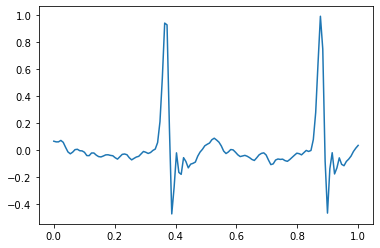

In [150]:
plt.plot(np.linspace(0,1,130), (ecg-np.mean(ecg))/np.max(np.abs(ecg)))
print(yp0)
print(y0)